In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv( 'adult.csv' )
data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [3]:
print ('Для age пустых строк {}'.format( len( data[pd.isnull(data['age'])] )))
print ('Для occupation пустых строк {}'.format( len( data[data['occupation'] =='?'] )))
print ('Для education пустых строк {}'.format( len( data[data['education'] =='?'] )))
print ('Для educational-num пустых строк {}'.format( len(data[pd.isnull(data['educational-num'])] )))
print ('Для capital-gain пустых строк {}'.format( len(data[pd.isnull(data['capital-gain'])] )))
print ('Для capital-loss пустых строк {}'.format( len(data[pd.isnull(data['capital-loss'])] )))
print ('Для hours-per-week пустых строк {}'.format( len(data[pd.isnull(data['hours-per-week'])] )))
print ('Всего сторк {}'.format( len( data ) ))

Для age пустых строк 0
Для occupation пустых строк 2809
Для education пустых строк 0
Для educational-num пустых строк 0
Для capital-gain пустых строк 0
Для capital-loss пустых строк 0
Для hours-per-week пустых строк 0
Всего сторк 48842


In [4]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [5]:
le.fit(data['income'])
y = pd.Series(le.transform(data['income']))
y.head()

0    0
1    0
2    1
3    1
4    0
dtype: int32

In [6]:
sc = data[['age','capital-gain','education','occupation','capital-loss','educational-num','hours-per-week']]
X = pd.get_dummies(sc, columns=['education','occupation'])
X.head()

,age,capital-gain,capital-loss,educational-num,hours-per-week,education_10th,education_11th,education_12th,education_1st-4th,education_5th-6th,...,occupation_Farming-fishing,occupation_Handlers-cleaners,occupation_Machine-op-inspct,occupation_Other-service,occupation_Priv-house-serv,occupation_Prof-specialty,occupation_Protective-serv,occupation_Sales,occupation_Tech-support,occupation_Transport-moving
0,25,0,0,7,40,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,38,0,0,9,50,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,28,0,0,12,40,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,44,7688,0,10,40,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,18,0,0,10,30,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [9]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until


In [40]:
from sklearn.linear_model import LogisticRegression

In [58]:
model = LogisticRegression()
model.fit(X_train, y_train)
print('Score - ',model.score(X_test, y_test))
proba = model.predict_proba(X_test)
preds = model.predict(X_test)
print('AUC - ', auc(fpr,tpr))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Score -  0.8182624718487682
AUC -  0.8471385301255802


In [59]:
from sklearn.tree import DecisionTreeClassifier
model2 = DecisionTreeClassifier(max_depth=10)
model2.fit(X_train, y_train)
print('Score - ', model2.score(X_test, y_test))
proba2 = model2.predict_proba(X_test)
preds2 = model2.predict(X_test)
fpr2, tpr2, thres2 = roc_curve( y_test, proba2[:, 1] )
print('AUC - ', auc(fpr2,tpr2))

Score -  0.834777861188835
AUC -  0.8564277592119586


In [62]:
from sklearn.ensemble import RandomForestClassifier
model3 = RandomForestClassifier(max_depth=10, n_estimators=10, max_features=1)
model3.fit(X_train, y_train)
print('Score - ', model3.score(X_test, y_test))
proba3 = model3.predict_proba(X_test)
preds3 = model3.predict(X_test)
fpr3, tpr3, thres3 = roc_curve( y_test, proba3[:, 1] )
print('AUC - ', auc(fpr3,tpr3))

Score -  0.8074114515798813
AUC -  0.851949632415033


In [63]:
from sklearn.neighbors import KNeighborsClassifier
model4 = KNeighborsClassifier(3)
model4.fit(X_train, y_train)
print('Score - ', model4.score(X_test, y_test))
proba4 = model4.predict_proba(X_test)
preds4 = model4.predict(X_test)
fpr4, tpr4, thres4 = roc_curve( y_test, proba4[:, 1] )
print('AUC-' ,auc(fpr4,tpr4))

Score -  0.7913055347027912
AUC- 0.7660016215649171


In [64]:
from sklearn.metrics import auc,roc_curve
%pylab inline

Populating the interactive namespace from numpy and matplotlib


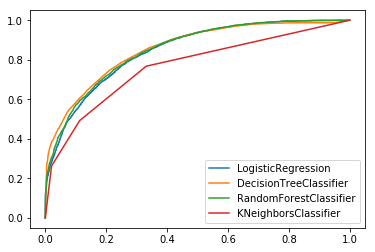

In [65]:
plt.plot( fpr, tpr, label="LogisticRegression" )
plt.plot( fpr2, tpr2,label="DecisionTreeClassifier" )
plt.plot( fpr3, tpr3,label="RandomForestClassifier" )
plt.plot( fpr4, tpr4,label="KNeighborsClassifier" )
plt.legend( loc = 0 )
plt.show()